In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from bs4 import BeautifulSoup
import scipy.stats as stats


In [94]:
#load popularity dataset
popularity = pd.read_csv('/Users/khanhnguyen/UNI/S2_2023/Grand Challenges/archive (1)/Database to calculate popularity.csv')
#filter popularity dataset for AUS and global
global_popularity = popularity.loc[(popularity['country']=='Global')]
aus_popularity = popularity.loc[(popularity['country']=='Australia')]
#load temporal dataset
temporal= pd.read_csv('/Users/khanhnguyen/UNI/S2_2023/Grand Challenges/archive (1)/Final database.csv')
#adjust formatting of temporal dataset
temporal.columns = temporal.columns.str.lower()
#filter temporal dataset for AUS and global
global_temporal=temporal.loc[(temporal['country']=='Global')]
aus_temporal=temporal.loc[(temporal['country']=='Australia')]
#merge popularity and temporal dataset for AUS and global
global_daily_ranks=global_popularity.merge(global_temporal, on="uri")
aus_daily_ranks=aus_popularity.merge(aus_temporal, on="uri")

/var/folders/50/6zclk4957ygc468lz_x8jjt80000gn/T/ipykernel_90837/3862489860.py:7: DtypeWarning: Columns (7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  temporal= pd.read_csv('/Users/khanhnguyen/UNI/S2_2023/Grand Challenges/archive (1)/Final database.csv')


In [95]:
# Calculate the adjusted valence by multiplying valence with popularity
global_daily_ranks['popularity'] = pd.to_numeric(global_daily_ranks['popularity'], errors='coerce')
aus_daily_ranks['popularity'] = pd.to_numeric(aus_daily_ranks['popularity'], errors='coerce')
global_daily_ranks['valence'] = pd.to_numeric(global_daily_ranks['valence'], errors='coerce')
aus_daily_ranks['valence'] = pd.to_numeric(aus_daily_ranks['valence'], errors='coerce')
global_daily_ranks['adjusted_valence_popularity'] = global_daily_ranks['valence'] * global_daily_ranks['popularity']
aus_daily_ranks['adjusted_valence_popularity'] = aus_daily_ranks['valence'] * aus_daily_ranks['popularity']
global_daily_ranks['date'] = pd.to_datetime(global_daily_ranks['date'])
aus_daily_ranks['date'] = pd.to_datetime(aus_daily_ranks['date'])

#normalising data to have range from 0 to 1
min_val = aus_daily_ranks['adjusted_valence_popularity'].min()
max_val = aus_daily_ranks['adjusted_valence_popularity'].max()
aus_daily_ranks['scaled_adjusted_valence'] = (aus_daily_ranks['adjusted_valence_popularity'] - min_val) / (max_val - min_val)
aus_daily_ranks.tail()

# Export aus_daily_ranks to CSV
aus_daily_ranks.to_csv('aus_daily_ranks.csv', index=False)

# Export global_daily_ranks to CSV
global_daily_ranks.to_csv('global_daily_ranks.csv', index=False)


/var/folders/50/6zclk4957ygc468lz_x8jjt80000gn/T/ipykernel_90837/2732800286.py:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  global_daily_ranks['date'] = pd.to_datetime(global_daily_ranks['date'])
/var/folders/50/6zclk4957ygc468lz_x8jjt80000gn/T/ipykernel_90837/2732800286.py:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  aus_daily_ranks['date'] = pd.to_datetime(aus_daily_ranks['date'])


In [96]:
# Calculate the baseline valence

# Filter the dataset to the year 2019
start_date = pd.Timestamp("2019-01-01")
end_date = pd.Timestamp("2019-12-31")
data_2019 = aus_daily_ranks[(aus_daily_ranks["date"] >= start_date) & (aus_daily_ranks["date"] <= end_date)]


# Calculate the scaled_adjusted_valence for 2019
baseline_valence_2019 = data_2019['scaled_adjusted_valence'].mean()
baseline_valence = aus_daily_ranks['scaled_adjusted_valence'].mean()



print(baseline_valence)

0.08591225218361472


In [97]:
aus_daily_ranks['log_ratio'] = np.log((aus_daily_ranks['scaled_adjusted_valence'] +1e-9)/ (baseline_valence_2019+1e9))
aus_daily_ranks.tail()

,Unnamed: 0,country_x,date,position,uri,track,title_x,artist_x,country_y,popularity,...,turkey,uk,usa,popu_max,top10_dummy,top50_dummy,cluster,adjusted_valence_popularity,scaled_adjusted_valence,log_ratio
267594,1681182,Australia,2017-01-01,183.0,https://open.spotify.com/track/5pfJsMwoRYKampP...,"Downtown , Macklemore, Ryan Lewis, Grandmast...",Downtown,"Macklemore, Ryan Lewis, Grandmaster Melle Mel",Australia,29.6,...,0,0,0,182,0,0,english speaking and nordic,20.9272,0.000113,-29.807205
267595,1680997,Australia,2017-02-01,198.0,https://open.spotify.com/track/6IcrwGdIvRsrImO...,"See You Again , Wiz Khalifa",See You Again,Wiz Khalifa,Australia,8.0,...,0,0,0,194,0,0,english speaking and nordic,2.2640,0.000012,-32.070106
267596,1681193,Australia,2017-01-01,194.0,https://open.spotify.com/track/6IcrwGdIvRsrImO...,"See You Again , Wiz Khalifa",See You Again,Wiz Khalifa,Australia,8.0,...,0,0,0,194,0,0,english speaking and nordic,2.2640,0.000012,-32.070106
267597,1680998,Australia,2017-02-01,199.0,https://open.spotify.com/track/6JyuJFedEvPmdWQ...,"Purple Lamborghini , Skrillex",Purple Lamborghini,Skrillex,Australia,1.6,...,0,0,0,199,0,0,english speaking and nordic,0.4768,0.000002,-33.810728
267598,1681199,Australia,2017-01-01,200.0,https://open.spotify.com/track/0k93MXOj0kSXo84...,"Ocean Drive , Duke Dumont",Ocean Drive,Duke Dumont,Australia,0.8,...,0,0,0,200,0,0,english speaking and nordic,0.4528,0.000002,-33.875936


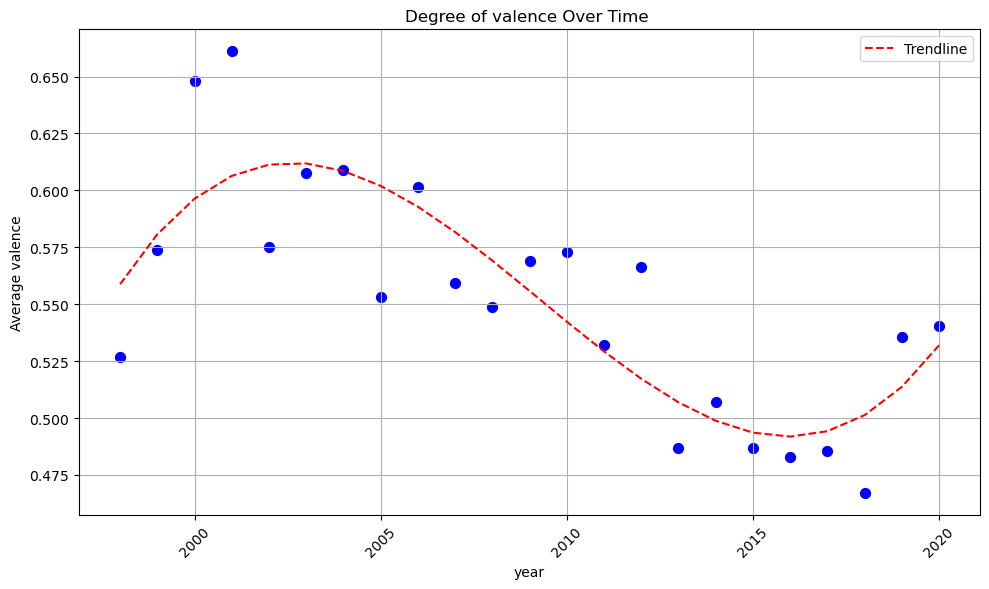

In [101]:
#load historic data and show valence trend
historic_data=pd.read_csv("/Users/khanhnguyen/UNI/S2_2023/Grand Challenges/2000_2019.csv")
avg = historic_data.groupby('year')['valence'].mean().reset_index()
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(avg['year'], avg['valence'], color='blue', marker='o', s=50)
plt.title('Degree of valence Over Time ')
plt.xlabel('year')
plt.ylabel('Average valence')
plt.grid(True)
plt.xticks(rotation=45)

# Adding a trendline
coefficients = np.polyfit(avg.index, avg['valence'], 3)
polynomial = np.poly1d(coefficients)
x_values = np.linspace(avg.index.min(), avg.index.max(), len(avg))
plt.plot(avg['year'], polynomial(avg.index), color='red', linestyle='--', label='Trendline')

plt.legend()
plt.tight_layout()
plt.show()  # Display the plot


/var/folders/50/6zclk4957ygc468lz_x8jjt80000gn/T/ipykernel_90837/2584880931.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_daily_ranks['log_ratio'] = pd.to_numeric(filtered_daily_ranks['log_ratio'], errors='coerce')  # Convert non-numeric values to NaN


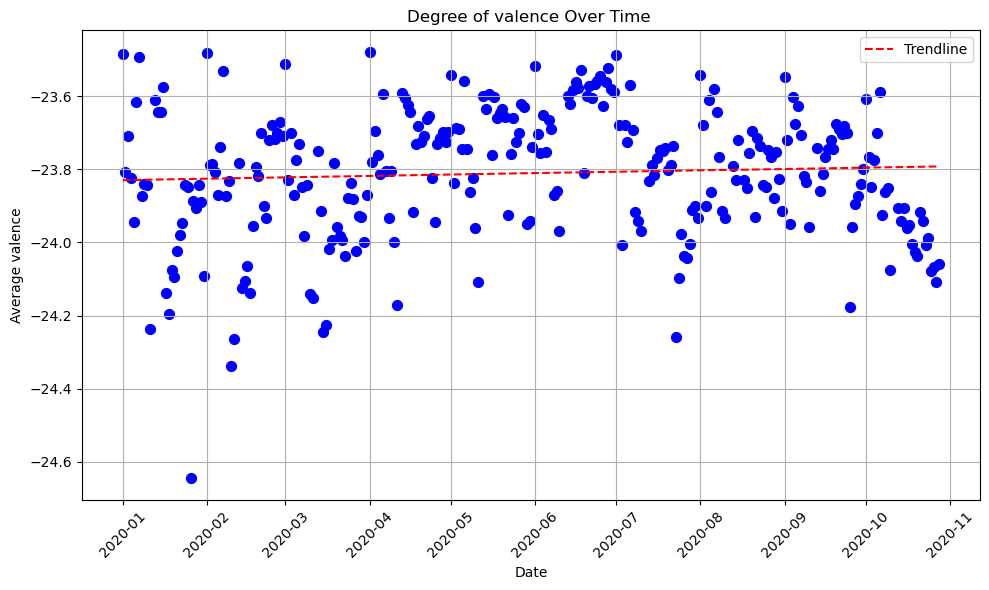

In [102]:
start_date = pd.Timestamp("2020-01-01")
end_date = pd.Timestamp("2020-10-28")
filtered_daily_ranks = aus_daily_ranks[(aus_daily_ranks["date"] >= start_date) & (aus_daily_ranks["date"] <= end_date)]
filtered_daily_ranks['log_ratio'] = pd.to_numeric(filtered_daily_ranks['log_ratio'], errors='coerce')  # Convert non-numeric values to NaN
avg = filtered_daily_ranks.groupby('date')['log_ratio'].mean().reset_index()

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(avg['date'], avg['log_ratio'], color='blue', marker='o', s=50)
plt.title('Degree of valence Over Time ')
plt.xlabel('Date')
plt.ylabel('Average valence')
plt.grid(True)
plt.xticks(rotation=45)


# Adding a trendline
coefficients = np.polyfit(avg.index, avg['log_ratio'], 1)
polynomial = np.poly1d(coefficients)
x_values = np.linspace(avg.index.min(), avg.index.max(), len(avg))
plt.plot(avg['date'], polynomial(avg.index), color='red', linestyle='--', label='Trendline')

plt.legend()
plt.tight_layout()
plt.show()  # Display the plot

In [103]:
# Define the date range for Christmas carols
start_date = pd.Timestamp('2020-12-23')
end_date = pd.Timestamp('2021-1-1')

# Define the conditions for removal 
# these conditions are gotten from https://www.sciencedirect.com/science/article/pii/S1875952122000593?casa_token=eqaNCiRzhp8AAAAA:sOr20vzyos0m_XzQoWVwnoZc_HTNr_cMbeCjwh2CQghARiKaTlTrX2VVNXjpw6SB_g1UN9Ic7XU#sec3.3.1
condition_d = 0.64
condition_e = 0.60
condition_v = 0.56

numeric_columns = ['danceability', 'energy', 'valence']
aus_daily_ranks[numeric_columns] = aus_daily_ranks[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Create a mask based on the conditions and date range
mask = (
    (aus_daily_ranks['date'] >= start_date) & (aus_daily_ranks['date'] <= end_date) &
    (aus_daily_ranks['danceability'] > condition_d) & (aus_daily_ranks['energy'] > condition_e) & (aus_daily_ranks['valence'] > condition_v)
)

# Filter the dataset to keep rows that don't meet the conditions
filtered_dataset = aus_daily_ranks[~mask]

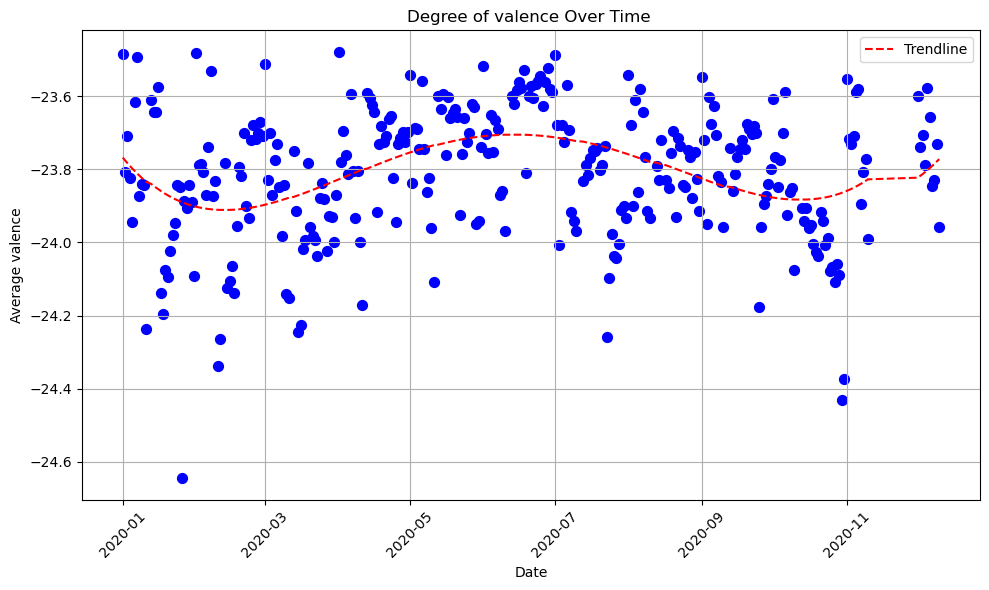

In [104]:
start_date = pd.Timestamp("2020-01-01")
end_date = pd.Timestamp("2020-12-27")
filtered = filtered_dataset[(filtered_dataset["date"] >= start_date) & (filtered_dataset["date"] <= end_date)]


avg = filtered.groupby('date')['log_ratio'].mean().reset_index()


# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(avg['date'], avg['log_ratio'], color='blue', marker='o', s=50)
plt.title('Degree of valence Over Time ')
plt.xlabel('Date')
plt.ylabel('Average valence')
plt.grid(True)
plt.xticks(rotation=45)
# Adding a trendline
coefficients = np.polyfit(avg.index, avg['log_ratio'], 4)
polynomial = np.poly1d(coefficients)
x_values = np.linspace(avg.index.min(), avg.index.max(), len(avg))
plt.plot(avg['date'], polynomial(avg.index), color='red', linestyle='--', label='Trendline')

plt.legend()
plt.tight_layout()
plt.show()  # Display the plot

In [105]:
stringency = pd.read_csv('/Users/khanhnguyen/UNI/S2_2023/Grand Challenges/owid-covid-data.csv')
aus_stringency = stringency.loc[(stringency['location']=='Australia')]
aus_stringency.tail() 
aus_stringency['date'] = pd.to_datetime(aus_stringency['date'])
start_date = pd.Timestamp("2019-01-01")
end_date = pd.Timestamp("2020-12-27")

# Filter aus_stringency based on the date range
filtered_aus_stringency = aus_stringency[(aus_stringency['date'] >= start_date) & (aus_stringency['date'] <= end_date)]
filtered_aus_stringency = filtered_aus_stringency[['date', 'stringency_index', 'new_cases_per_million']]
aus_daily_ranks = avg[['date', 'log_ratio']]


/var/folders/50/6zclk4957ygc468lz_x8jjt80000gn/T/ipykernel_90837/3369458558.py:1: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  stringency = pd.read_csv('/Users/khanhnguyen/UNI/S2_2023/Grand Challenges/owid-covid-data.csv')
/var/folders/50/6zclk4957ygc468lz_x8jjt80000gn/T/ipykernel_90837/3369458558.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aus_stringency['date'] = pd.to_datetime(aus_stringency['date'])


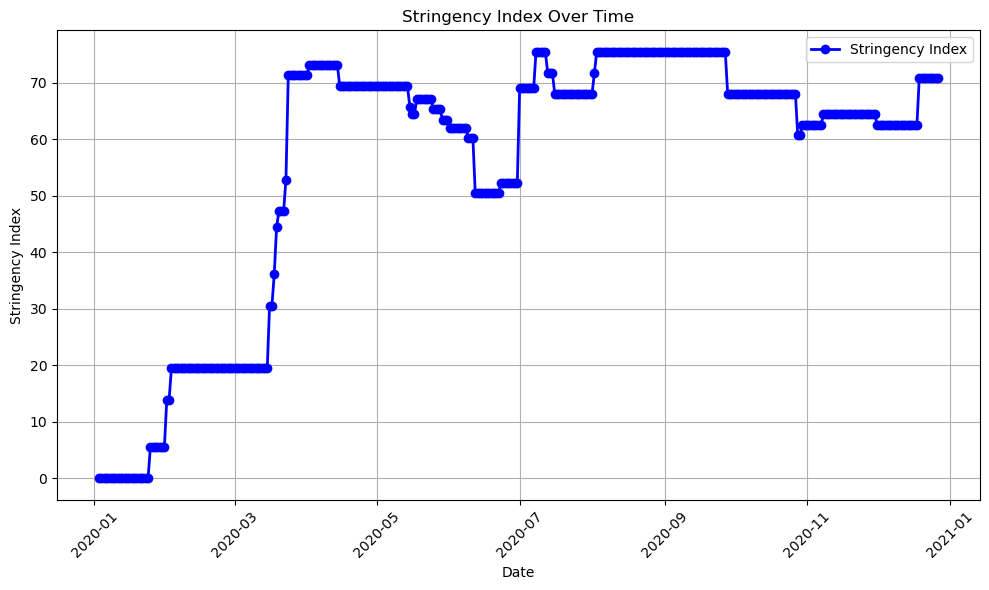

In [106]:

# Line plot with trendline
plt.figure(figsize=(10, 6))
plt.plot(filtered_aus_stringency['date'], filtered_aus_stringency['stringency_index'], color='blue', marker='o', linestyle='-', linewidth=2, label='Stringency Index')
plt.title('Stringency Index Over Time')
plt.xlabel('Date')
plt.ylabel('Stringency Index')
plt.grid(True)
plt.xticks(rotation=45)


plt.legend()
plt.tight_layout()
plt.show()  # Display the plot


/var/folders/50/6zclk4957ygc468lz_x8jjt80000gn/T/ipykernel_90837/2524131682.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


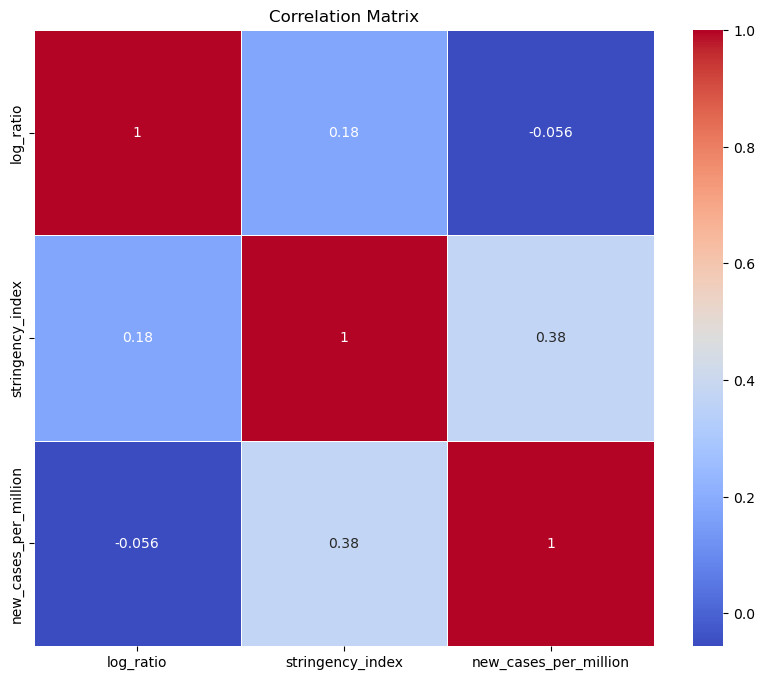

In [107]:
import seaborn as sns
merged_df = pd.merge(aus_daily_ranks, filtered_aus_stringency, on='date', how='inner')
merged_df.head()
merged_df.to_csv('australia_data.csv', index=False)
# Calculate the correlation matrix
correlation_matrix = merged_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


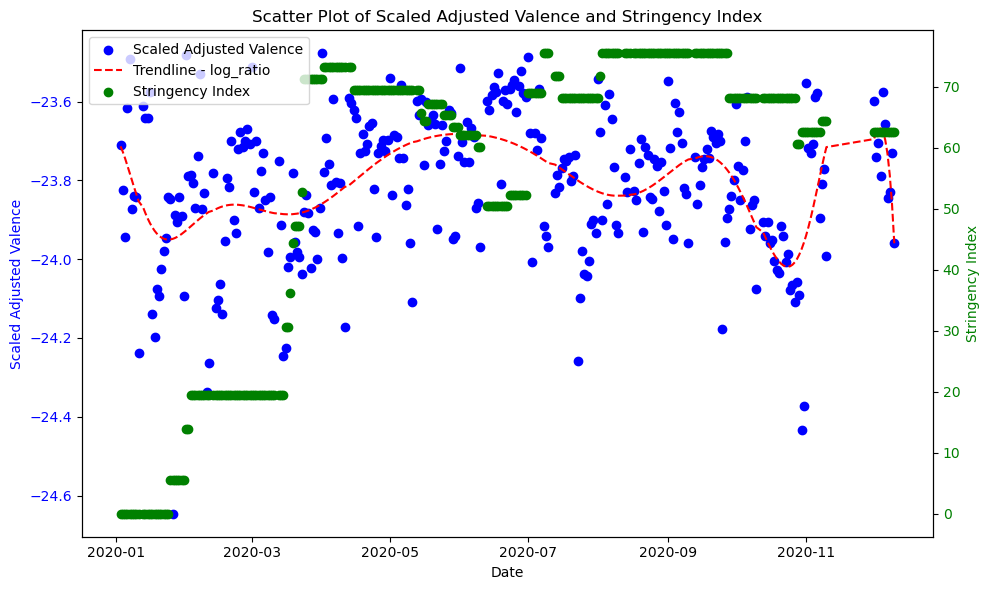

In [108]:
fig, ax1 = plt.subplots(figsize=(10, 6))


# Scatter plot for scaled_adjusted_valence
ax1.scatter(merged_df['date'], merged_df['log_ratio'], color='blue', label='Scaled Adjusted Valence')
ax1.set_xlabel('Date')
ax1.set_ylabel('Scaled Adjusted Valence', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

coefficients = np.polyfit(merged_df.index, merged_df['log_ratio'], 12)  # Change the degree to 1 for a linear trendline
polynomial = np.poly1d(coefficients)
x_values = np.arange(len(merged_df))
ax1.plot(merged_df['date'], polynomial(x_values), color='red', linestyle='--', label='Trendline - log_ratio')

# Create a second y-axis (right y-axis) for stringency_index
ax2 = ax1.twinx()
ax2.scatter(merged_df['date'], merged_df['stringency_index'], color='green', label='Stringency Index')
ax2.set_ylabel('Stringency Index', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Show legends for both y-axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Scatter Plot of Scaled Adjusted Valence and Stringency Index')
plt.tight_layout()
plt.show()

In [109]:
avg = merged_df.groupby('stringency_index')['log_ratio'].mean().reset_index()


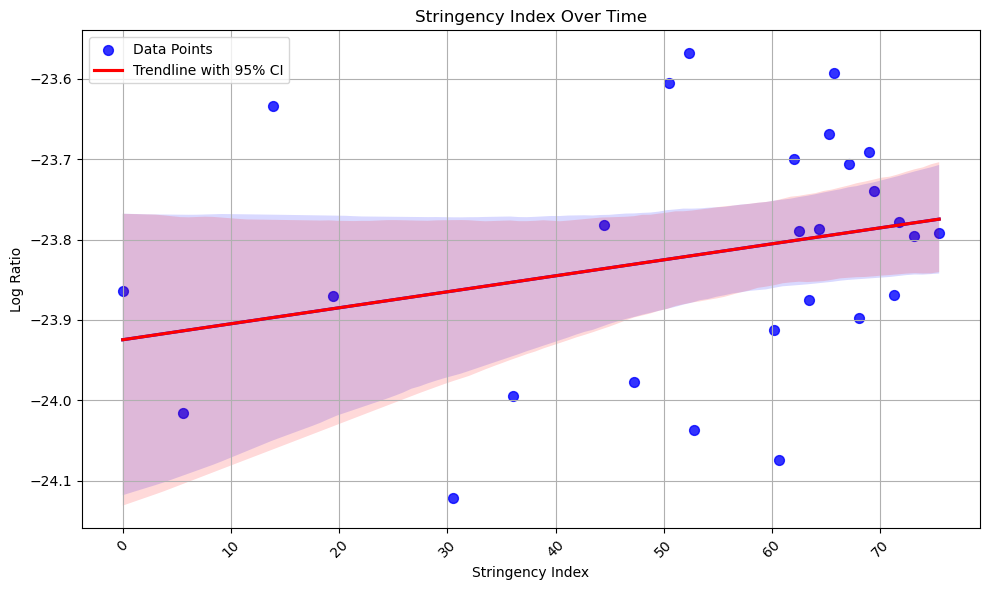

In [110]:
import seaborn as sns
# Convert the data to a DataFrame
df = pd.DataFrame(avg)

plt.figure(figsize=(10, 6))

# Scatter plot with trendline and confidence interval
sns.regplot(x='stringency_index', y='log_ratio', data=df, color='blue', scatter_kws={'s': 50}, label='Data Points')
sns.regplot(x='stringency_index', y='log_ratio', data=df, ci=95, color='red', scatter=False, label='Trendline with 95% CI')

plt.title('Stringency Index Over Time')
plt.xlabel('Stringency Index')
plt.ylabel('Log Ratio')
plt.grid(True)
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


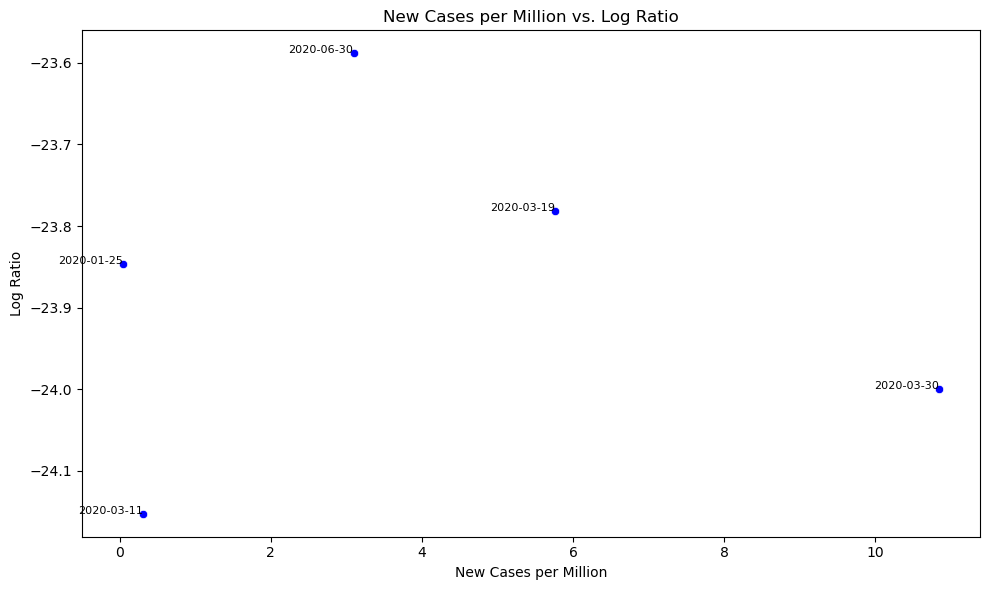

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named merged_df with the required data

# Selected dates
selected_dates = pd.to_datetime(['2020-01-25', '2020-03-11', '2020-03-19', '2020-03-30', '2020-06-30', '2020-08-16', '2020-12-19'])

# Filter merged_df for selected dates
selected_days = merged_df[merged_df['date'].isin(selected_dates)]

plt.figure(figsize=(10, 6))

# Scatter plot new_cases_per_million against log_ratio
sns.scatterplot(x='new_cases_per_million', y='log_ratio', data=selected_days, color='blue')

# Label the dots with dates
for index, row in selected_days.iterrows():
    plt.text(row['new_cases_per_million'], row['log_ratio'], row['date'].strftime('%Y-%m-%d'), fontsize=8, ha='right')

plt.title('New Cases per Million vs. Log Ratio')
plt.xlabel('New Cases per Million')
plt.ylabel('Log Ratio')

plt.tight_layout()
plt.show()


In [90]:
selected_days.head()

,date,log_ratio,stringency_index,new_cases_per_million
21,2020-01-25,-23.846745,5.56,0.038
66,2020-03-11,-24.152797,19.44,0.306
73,2020-03-19,-23.781907,44.44,5.768
84,2020-03-30,-23.999451,71.30,10.849
172,2020-06-30,-23.588258,52.31,3.094


In [92]:
# Filter data for the year 2020
start_date = '2020-01-01'
end_date = '2020-12-31'
data_2020 = aus_daily_ranks[(aus_daily_ranks['date'] >= start_date) & (aus_daily_ranks['date'] <= end_date)]

# Add a small constant to prevent division by zero or negative values
epsilon = 1e-6  # Small positive constant

# Calculate 'log_ratio' with added epsilon for 2020
data_2020['log_ratio'] = np.log((data_2020['scaled_adjusted_valence'] + epsilon)/(baseline_valence_2019 + epsilon))

# Group data by date and calculate the mean of 'log_ratio' for 2020
average_log_ratio_2020 = data_2020.groupby('date')['log_ratio'].mean().reset_index()

# Create a scatter plot for 'log_ratio' in 2020
plt.figure(figsize=(12, 6))
plt.scatter(average_log_ratio_2020['date'], average_log_ratio_2020['log_ratio'], color='blue', label='Log Ratio (2020)', s=50)

# Calculate and plot the trendline for 'log_ratio' in 2020
z = np.polyfit(range(len(average_log_ratio_2020)), average_log_ratio_2020['log_ratio'], 1)
p = np.poly1d(z)
plt.plot(average_log_ratio_2020['date'], p(range(len(average_log_ratio_2020))), "r--", label='Trendline')

plt.xlabel('Date')
plt.ylabel('Log Ratio')
plt.title('Log Ratio of Scaled Adjusted Valence (2020) with Trendline')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


KeyError: 'scaled_adjusted_valence'

In [ ]:
aus_daily_ranks['date'] = pd.to_datetime(aus_daily_ranks['date'])

# Filter the DataFrame to include only rows from the year 2020
mask_2020 = (aus_daily_ranks['date'].dt.year == 2020)
aus_daily_ranks_2020 = aus_daily_ranks[mask_2020]

# Calculate the average 'valence' for the year 2020
average_valence_2020 = aus_daily_ranks_2020['scaled_adjusted_valence'].mean()

print(f"Average 'valence' in 2020: {average_valence_2020}")

In [25]:
print(baseline_valence)

0.08591225218361472


In [19]:
print(baseline_valence_2019)

0.09299644469682633


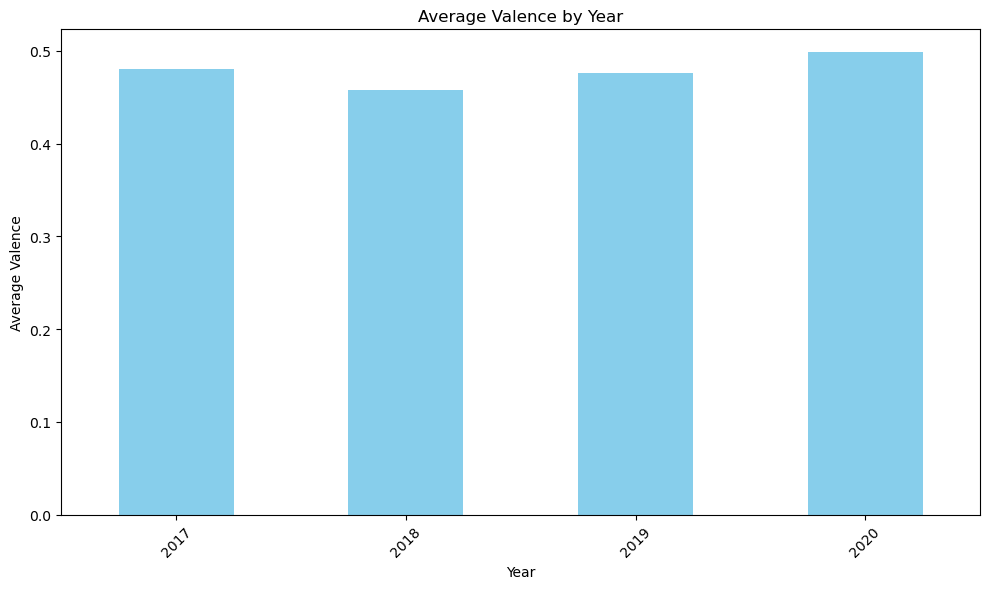

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'aus_daily_ranks' is your DataFrame
# First, ensure the 'date' column is in datetime format
aus_daily_ranks['date'] = pd.to_datetime(aus_daily_ranks['date'])

# Group the DataFrame by year and calculate the average 'valence' for each year
average_valence_by_year = aus_daily_ranks.groupby(aus_daily_ranks['date'].dt.year)['valence'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
average_valence_by_year.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Average Valence')
plt.title('Average Valence by Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()
